In [1]:
# load and the test weekly fpl scrape
season="2019-20"
gw=17
model_type="nn"

In [2]:
import os
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pickle

Using TensorFlow backend.


In [3]:
os.chdir(os.path.join(os.getcwd(), "..", "..", "data"));

In [4]:
random_state = np.random.seed(24)

In [5]:
X_train = pd.read_csv("x-train.csv");
X_test = pd.read_csv("x-test.csv");
X_val = pd.read_csv("x-val.csv");

In [6]:
y_train = pd.read_csv("y-train.csv");
y_test = pd.read_csv("y-test.csv");
y_val = pd.read_csv("y-val.csv");

In [7]:
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)

X train shape:  (4404, 68)
y train shape:  (4404, 1)


In [8]:
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X test shape:  (1468, 68)
y test shape:  (1468, 1)


In [9]:
print("X val shape: ", X_val.shape)
print("y val shape: ", y_val.shape)

X val shape:  (1468, 68)
y val shape:  (1468, 1)


In [10]:
# scaler = MinMaxScaler()

In [11]:
# X_train_scaled = scaler.fit_transform(X_train);

In [12]:
# X_val_scaled = scaler.transform(X_val)

In [13]:
def create_mlp(dim, dropout=0.1, l2_reg=0.01, regress=False):
    # define our MLP network
    model = Sequential();
    
    model.add(Dense(8, input_dim=dim, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(7, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(6, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(5, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(4, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(3, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(2, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
 
    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, kernel_regularizer=regularizers.l2(l2_reg), activation="linear"));
 
    # return our model
    return model

In [14]:
model = create_mlp(X_train.shape[1], dropout=0.07, l2_reg=0.07, regress=True)
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt);

W1213 11:29:30.515365 4705365312 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1213 11:29:30.530734 4705365312 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1213 11:29:30.533368 4705365312 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1213 11:29:30.549865 4705365312 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1213 11:29:30.556805 4705365312 deprecati

In [15]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
                              verbose=0, mode='auto')

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=500, shuffle=True, callbacks=[es], verbose=1)

W1213 11:29:31.262804 4705365312 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 4404 samples, validate on 1468 samples
Epoch 1/500
4404/4404 [==============================] - 1s 224us/step - loss: 56.0384 - val_loss: 31.0094
Epoch 2/500
4404/4404 [==============================] - 0s 58us/step - loss: 45.5764 - val_loss: 30.4903
Epoch 3/500
4404/4404 [==============================] - 0s 60us/step - loss: 38.7110 - val_loss: 29.9829
Epoch 4/500
4404/4404 [==============================] - 0s 54us/step - loss: 36.2550 - val_loss: 29.4965
Epoch 5/500
4404/4404 [==============================] - 0s 58us/step - loss: 33.2755 - val_loss: 29.0186
Epoch 6/500
4404/4404 [==============================] - 0s 62us/step - loss: 32.1752 - val_loss: 28.5618
Epoch 7/500
4404/4404 [==============================] - 0s 55us/step - loss: 30.2467 - val_loss: 28.1036
Epoch 8/500
4404/4404 [==============================] - 0s 57us/step - loss: 29.2088 - val_loss: 27.6609
Epoch 9/500
4404/4404 [==============================] - 0s 56us/step - loss: 28.5537 - val_loss: 27.19

4404/4404 [==============================] - 0s 60us/step - loss: 10.8019 - val_loss: 10.1606
Epoch 78/500
4404/4404 [==============================] - 0s 58us/step - loss: 10.8510 - val_loss: 10.0972
Epoch 79/500
4404/4404 [==============================] - 0s 59us/step - loss: 10.6259 - val_loss: 10.0377
Epoch 80/500
4404/4404 [==============================] - 0s 64us/step - loss: 10.5750 - val_loss: 9.9786
Epoch 81/500
4404/4404 [==============================] - 0s 54us/step - loss: 10.6899 - val_loss: 9.9220
Epoch 82/500
4404/4404 [==============================] - 0s 56us/step - loss: 10.5235 - val_loss: 9.8677
Epoch 83/500
4404/4404 [==============================] - 0s 56us/step - loss: 10.4748 - val_loss: 9.8153
Epoch 84/500
4404/4404 [==============================] - 0s 74us/step - loss: 10.5233 - val_loss: 9.7672
Epoch 85/500
4404/4404 [==============================] - 0s 71us/step - loss: 10.3940 - val_loss: 9.7186
Epoch 86/500
4404/4404 [==============================] 

4404/4404 [==============================] - 0s 61us/step - loss: 8.9409 - val_loss: 8.2605
Epoch 155/500
4404/4404 [==============================] - 0s 54us/step - loss: 8.9562 - val_loss: 8.2415
Epoch 156/500
4404/4404 [==============================] - 0s 53us/step - loss: 8.9599 - val_loss: 8.2319
Epoch 157/500
4404/4404 [==============================] - 0s 57us/step - loss: 8.9125 - val_loss: 8.2227
Epoch 158/500
4404/4404 [==============================] - 0s 53us/step - loss: 8.9656 - val_loss: 8.2212
Epoch 159/500
4404/4404 [==============================] - 0s 60us/step - loss: 8.8185 - val_loss: 8.2140
Epoch 160/500
4404/4404 [==============================] - 0s 54us/step - loss: 8.7976 - val_loss: 8.2094
Epoch 161/500
4404/4404 [==============================] - 0s 57us/step - loss: 8.9037 - val_loss: 8.2084
Epoch 162/500
4404/4404 [==============================] - 0s 55us/step - loss: 8.9430 - val_loss: 8.2071
Epoch 163/500
4404/4404 [==============================] - 0

4404/4404 [==============================] - 0s 57us/step - loss: 8.6354 - val_loss: 7.9533
Epoch 232/500
4404/4404 [==============================] - 0s 55us/step - loss: 8.5602 - val_loss: 7.9530
Epoch 233/500
4404/4404 [==============================] - 0s 53us/step - loss: 8.5004 - val_loss: 7.9501
Epoch 234/500
4404/4404 [==============================] - 0s 53us/step - loss: 8.4863 - val_loss: 7.9468
Epoch 235/500
4404/4404 [==============================] - 0s 53us/step - loss: 8.5561 - val_loss: 7.9449
Epoch 236/500
4404/4404 [==============================] - 0s 52us/step - loss: 8.3816 - val_loss: 7.9425
Epoch 237/500
4404/4404 [==============================] - 0s 53us/step - loss: 8.4677 - val_loss: 7.9400
Epoch 238/500
4404/4404 [==============================] - 0s 54us/step - loss: 8.3424 - val_loss: 7.9380
Epoch 239/500
4404/4404 [==============================] - 0s 54us/step - loss: 8.4992 - val_loss: 7.9352
Epoch 240/500
4404/4404 [==============================] - 0

4404/4404 [==============================] - 0s 71us/step - loss: 8.1942 - val_loss: 7.8076
Epoch 309/500
4404/4404 [==============================] - 0s 78us/step - loss: 8.2963 - val_loss: 7.8061
Epoch 310/500
4404/4404 [==============================] - 0s 59us/step - loss: 8.1466 - val_loss: 7.8059
Epoch 311/500
4404/4404 [==============================] - 0s 70us/step - loss: 8.2231 - val_loss: 7.8046
Epoch 312/500
4404/4404 [==============================] - 0s 65us/step - loss: 8.2634 - val_loss: 7.8025
Epoch 313/500
4404/4404 [==============================] - 0s 75us/step - loss: 8.1765 - val_loss: 7.8012
Epoch 314/500
4404/4404 [==============================] - 0s 77us/step - loss: 8.3039 - val_loss: 7.8003
Epoch 315/500
4404/4404 [==============================] - 0s 67us/step - loss: 8.1730 - val_loss: 7.8006
Epoch 316/500
4404/4404 [==============================] - 0s 67us/step - loss: 8.1756 - val_loss: 7.8015
Epoch 317/500
4404/4404 [==============================] - 0

4404/4404 [==============================] - 0s 92us/step - loss: 8.1086 - val_loss: 7.7320
Epoch 386/500
4404/4404 [==============================] - 0s 96us/step - loss: 8.1383 - val_loss: 7.7310
Epoch 387/500
4404/4404 [==============================] - 0s 96us/step - loss: 8.0942 - val_loss: 7.7292
Epoch 388/500
4404/4404 [==============================] - 0s 91us/step - loss: 8.0663 - val_loss: 7.7293
Epoch 389/500
4404/4404 [==============================] - 1s 301us/step - loss: 8.1433 - val_loss: 7.7288
Epoch 390/500
4404/4404 [==============================] - 2s 405us/step - loss: 8.1284 - val_loss: 7.7278
Epoch 391/500
4404/4404 [==============================] - 1s 319us/step - loss: 8.1915 - val_loss: 7.7384
Epoch 392/500
4404/4404 [==============================] - 1s 198us/step - loss: 8.0728 - val_loss: 7.7255
Epoch 393/500
4404/4404 [==============================] - 0s 98us/step - loss: 8.0502 - val_loss: 7.7254
Epoch 394/500
4404/4404 [==============================]

4404/4404 [==============================] - 0s 51us/step - loss: 8.0205 - val_loss: 7.6715
Epoch 463/500
4404/4404 [==============================] - 0s 50us/step - loss: 8.0284 - val_loss: 7.6687
Epoch 464/500
4404/4404 [==============================] - 0s 51us/step - loss: 7.9948 - val_loss: 7.6685
Epoch 465/500
4404/4404 [==============================] - 0s 50us/step - loss: 8.0737 - val_loss: 7.6709
Epoch 466/500
4404/4404 [==============================] - 0s 50us/step - loss: 7.9693 - val_loss: 7.6687
Epoch 467/500
4404/4404 [==============================] - 0s 51us/step - loss: 8.0283 - val_loss: 7.6686
Epoch 468/500
4404/4404 [==============================] - 0s 50us/step - loss: 8.0299 - val_loss: 7.6683
Epoch 469/500
4404/4404 [==============================] - 0s 50us/step - loss: 7.9909 - val_loss: 7.6656
Epoch 470/500
4404/4404 [==============================] - 0s 51us/step - loss: 8.0181 - val_loss: 7.6667
Epoch 471/500
4404/4404 [==============================] - 0

In [17]:
# X_test_scaled = scaler.transform(X_test)

In [18]:
# pickle.dump(scaler, open("scaler.sav", 'wb'))

In [19]:
y_true = np.array(y_test["total_points"]);

In [20]:
y_pred = model.predict(X_test);

In [21]:
pred_df = pd.DataFrame({'Actual': y_true.flatten(), 'Predicted': y_pred.flatten()})

In [22]:
def getInRange(actual, predicted, lower_bound=0, upper_bound=1):
    return ((actual - predicted) >= lower_bound) and ((actual - predicted) <= upper_bound)

In [23]:
pred_df["in_range"] = pred_df.apply(lambda row: getInRange(row["Actual"], row["Predicted"], 0, 1), axis=1)

In [24]:
print("In range: {0:.2f}".format(pred_df[pred_df["in_range"] == True].shape[0]/pred_df.shape[0]))

In range: 0.09


In [25]:
pred_df.head(25)

,Actual,Predicted,in_range
0,4.0,4.928530,False
1,7.0,4.899164,False
2,8.0,4.645432,False
3,5.0,3.557984,False
4,8.0,4.890161,False
5,7.0,4.943027,False
6,6.0,4.988772,False
7,9.0,5.059024,False
8,9.0,4.768284,False
9,8.0,4.989361,False


In [26]:
test_df = pred_df.head(25)

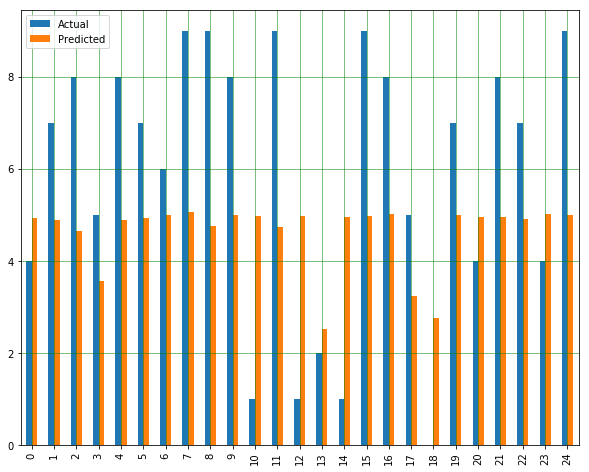

In [27]:
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

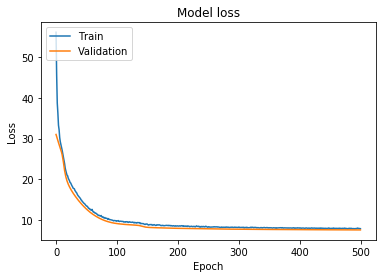

In [28]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.324860680817908
R2 score: 0.12415109303884064
Mean Squared Error: 7.148633711307478
Root Mean Squared Error: 2.673692897717963


In [30]:
filename = '{}-model.h5'.format(model_type)

In [31]:
gw_dir = os.path.join(os.getcwd(), "..", "model", season, str(gw))

In [32]:
if not os.path.exists(gw_dir):
    os.makedirs(gw_dir)

In [33]:
os.chdir(gw_dir)

In [34]:
model.save(filename)